# Business Problem : 

In my sophomore year of college, I visited Singapore for 6 months as an exchange student. I loved the diverse culture and the options of food available in the cities. So I was wodering how I'd go about my data work if I had to help someone with opening a restaurant. Lets gather some imp data 

In [46]:
import numpy as np # library to handle data in a vectorized manner
import bs4 
from urllib.request import urlopen
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Libraries imported.")

Libraries imported.


In [47]:
df = pd.read_html('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore')[2]

In [48]:
df

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000
5,Bukit Merah,*,红山,Hóng shān,புக்கிட் மேரா,Central,14.34,151980,11000
6,Bukit Panjang,*,武吉班让,Wǔjí bān ràng,பக்கிட் பஞ்சாங்,West,8.99,139280,15000
7,Bukit Timah,*,武吉知马,Wǔjí zhī mǎ,புக்கித் திமா,Central,17.53,77430,4400
8,Central Water Catchment,Kawasan Tadahan Air Tengah,中央集水区,Zhōngyāng jí shuǐ qū,மத்திய நீர் நீர்ப்பிடிப்பு,North,37.15,*,*
9,Changi,*,樟宜,Zhāng yí,சாங்கி,East,40.61,1830,80.62


In [49]:
df = df.drop(columns=['Malay', 'Chinese', 'Pinyin','Tamil'])

In [50]:
df.shape

(55, 5)

In [51]:
df.head()

,Name (English),Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,North-East,13.94,163950,13400
1,Bedok,East,21.69,279380,13000
2,Bishan,Central,7.62,88010,12000
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,153740,14000


# Foursquare geospatial data

In [52]:
pip install folium 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [53]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Next we will need the geographical co-ordinates of Singapore. 

In [54]:
address = 'Singapore'

geolocator = Nominatim(user_agent="Singapore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [63]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Singapore_explorer")
df['Major_Dist_Coord']= df['Name (English)'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)
df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df


,Name (English),Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523
1,Bedok,East,21.69,279380,13000,1.323976,103.930216
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591
5,Bukit Merah,Central,14.34,151980,11000,4.561694,101.024037
6,Bukit Panjang,West,8.99,139280,15000,1.379149,103.761413
7,Bukit Timah,Central,17.53,77430,4400,1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,1830,80.62,43.880078,126.564903


,Name (English),Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523
1,Bedok,East,21.69,279380,13000,1.323976,103.930216
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591
5,Bukit Merah,Central,14.34,151980,11000,4.561694,101.024037
6,Bukit Panjang,West,8.99,139280,15000,1.379149,103.761413
7,Bukit Timah,Central,17.53,77430,4400,1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,1830,80.62,43.880078,126.564903


Lets cluster neighborhood areas in Singapore 

In [64]:
# create map of Singapore  using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name (English)']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore) 
    
map_singapore

In [65]:
CLIENT_ID = 'JNHPV14FT35WYCXQLBDPWSZ5AWIF5X5JTXWNF031UGW3TAG1' # your Foursquare ID
CLIENT_SECRET = '0CAOSYWW0V52IIA211LY4II420VWJGESALXGOP31LFVJOTPQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: JNHPV14FT35WYCXQLBDPWSZ5AWIF5X5JTXWNF031UGW3TAG1
CLIENT_SECRET:0CAOSYWW0V52IIA211LY4II420VWJGESALXGOP31LFVJOTPQ


In [67]:
df.loc[0, 'Name (English)']

'Ang Mo Kio'

In [68]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name (English)'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ang Mo Kio are 1.3700803, 103.8495228.


In [69]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JNHPV14FT35WYCXQLBDPWSZ5AWIF5X5JTXWNF031UGW3TAG1&client_secret=0CAOSYWW0V52IIA211LY4II420VWJGESALXGOP31LFVJOTPQ&v=20180604&ll=1.3700803,103.8495228&radius=600&limit=15'

In [70]:
results = requests.get(url).json()

In [71]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

print('Completed.')

Completed.


In [72]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,FairPrice Xtra,Supermarket,1.369279,103.848886
1,Old Chang Kee,Snack Place,1.369094,103.848389
2,MOS Burger,Burger Joint,1.369170,103.847831
3,Pepper Lunch,Japanese Restaurant,1.369107,103.847791
4,NTUC FairPrice,Supermarket,1.371507,103.847082


In [73]:
print ('{} unique categories in Ang Mo Kio.'.format(nearby_venues['categories'].value_counts().shape[0]))

13 unique categories in Ang Mo Kio.


In [74]:
print (nearby_venues['categories'].value_counts()[0:15])

Supermarket             2
Coffee Shop             2
Fast Food Restaurant    1
Ramen Restaurant        1
Gym / Fitness Center    1
Noodle House            1
Japanese Restaurant     1
Bubble Tea Shop         1
Asian Restaurant        1
Snack Place             1
Chinese Restaurant      1
Miscellaneous Shop      1
Burger Joint            1
Name: categories, dtype: int64


In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [76]:
Singapore_venues = getNearbyVenues(names=df['Name (English)'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [77]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Singapore_Venues_only_restaurant = Singapore_venues[Singapore_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Singapore_Venues_only_restaurant.index = np.arange(1, len(Singapore_Venues_only_restaurant )+1)

In [78]:
print (Singapore_Venues_only_restaurant['Venue Category'].value_counts())

Chinese Restaurant                 220
Japanese Restaurant                108
Fast Food Restaurant                86
Asian Restaurant                    82
Indian Restaurant                   71
Italian Restaurant                  62
Thai Restaurant                     60
Seafood Restaurant                  49
Vegetarian / Vegan Restaurant       48
Restaurant                          47
Sushi Restaurant                    28
Hotpot Restaurant                   20
American Restaurant                 20
Korean Restaurant                   19
Dim Sum Restaurant                  17
French Restaurant                   16
Vietnamese Restaurant               15
Dumpling Restaurant                 14
Malay Restaurant                    12
Mexican Restaurant                  11
Indonesian Restaurant               11
Spanish Restaurant                  10
Ramen Restaurant                    10
Cantonese Restaurant                 9
Modern European Restaurant           9
Halal Restaurant         

In [79]:
print('There are {} uniques categories.'.format(len(Singapore_Venues_only_restaurant['Venue Category'].unique())))

There are 60 uniques categories.


In [80]:
# create a dataframe of top 10 categories
Singapore_5_Dist_Venues_Top10 = Singapore_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Singapore_5_Dist_Venues_Top10= Singapore_5_Dist_Venues_Top10.reset_index()
#Singapore_5_Dist_Venues_Top10

Singapore_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Singapore_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Chinese Restaurant,220
1,Japanese Restaurant,108
2,Fast Food Restaurant,86
3,Asian Restaurant,82
4,Indian Restaurant,71
5,Italian Restaurant,62
6,Thai Restaurant,60
7,Seafood Restaurant,49
8,Vegetarian / Vegan Restaurant,48
9,Restaurant,47


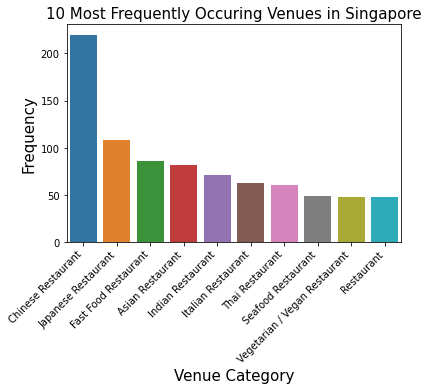

<Figure size 1296x504 with 0 Axes>

In [81]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Singapore_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Singapore', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [82]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Singapore_Venues_only_restaurant.shape)
Singapore_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (1143, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ang Mo Kio,1.370080,103.849523,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant
2,Ang Mo Kio,1.370080,103.849523,Nic & Tom Eatery,1.363508,103.865735,Chinese Restaurant
3,Ang Mo Kio,1.370080,103.849523,Sin Ming Roti Prata (Faisal & Aziz Curry Musli...,1.355269,103.836719,Indian Restaurant
4,Ang Mo Kio,1.370080,103.849523,Pepper Lunch,1.369107,103.847791,Japanese Restaurant
5,Ang Mo Kio,1.370080,103.849523,龍海鮮螃蟹王 Mellben Seafood,1.368324,103.836764,Seafood Restaurant
6,Ang Mo Kio,1.370080,103.849523,香记粥 (Xiang Ji Porridge),1.381202,103.840782,Chinese Restaurant
7,Ang Mo Kio,1.370080,103.849523,Lao San Kway Chap 老三棵汁·猪什汤,1.367916,103.837008,Chinese Restaurant
8,Ang Mo Kio,1.370080,103.849523,Tomyum Mama,1.353415,103.834441,Thai Restaurant
9,Ang Mo Kio,1.370080,103.849523,Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐,1.371975,103.846408,Chinese Restaurant
10,Ang Mo Kio,1.370080,103.849523,Tian Tian Dao Hokkien Fried Noodles 天天到福建炒虾面,1.367884,103.856683,Chinese Restaurant


In [83]:
Singapore_Venues_restaurant = Singapore_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [84]:
Singapore_Venues_restaurant

Neighborhood
Ang Mo Kio                 38
Bedok                      44
Bishan                     31
Boon Lay                   23
Bukit Batok                41
Bukit Merah                16
Bukit Panjang              25
Bukit Timah                31
Central Water Catchment     4
Changi                      1
Choa Chu Kang              11
Clementi                   34
Downtown Core              17
Geylang                    42
Hougang                    27
Jurong East                35
Jurong West                27
Kallang                    30
Lim Chu Kang                4
Marina East                14
Marina South               18
Marine Parade              37
Novena                     28
Outram                     26
Pasir Ris                  26
Paya Lebar                 43
Punggol                    28
Queenstown                 17
River Valley                5
Rochor                     21
Seletar                    31
Sembawang                  38
Sengkang                   

In [85]:
Singapore_Venues_restaurant_df  = Singapore_Venues_restaurant.to_frame().reset_index()
Singapore_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Singapore_Venues_restaurant_df.index = np.arange(1, len(Singapore_Venues_restaurant_df)+1)
list_rest_no = Singapore_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Singapore_Venues_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

In [86]:
# one hot encoding
Singapore_onehot = pd.get_dummies(Singapore_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Singapore_onehot['Neighborhood'] = Singapore_Venues_only_restaurant['Neighborhood'] 

Singapore_onehot.head()

,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio


In [87]:
# move neighborhood column to the front
fixed_columns = [Singapore_onehot.columns[-1]] + list(Singapore_onehot.columns[:-1])
Singapore_onehot = Singapore_onehot[fixed_columns]

Singapore_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Ang Mo Kio,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# get new dataframe size
Singapore_onehot.shape

(1143, 61)

In [89]:
## Now, we will group rows by neighborhood and show the mean of frequency occuring for each category of restaurants
Singapore_grouped = Singapore_onehot.groupby('Neighborhood').mean().reset_index()
Singapore_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Ang Mo Kio,0.000000,0.052632,0.000000,0.000000,0.421053,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.078947,0.000000,0.078947,0.000000,0.0,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.026316,0.026316,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.078947,0.000000,0.026316,0.000000
1,Bedok,0.045455,0.136364,0.000000,0.000000,0.295455,0.022727,0.000000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.068182,0.022727,0.022727,0.000000,0.022727,0.000000,0.0,0.000000,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.000000
2,Bishan,0.000000,0.096774,0.000000,0.000000,0.354839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.064516,0.000000,0.064516,0.000000,0.096774,0.000000,0.0,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.032258,0.000000,0.000000,0.096774,0.000000,0.000000,0.000000
3,Boon Lay,0.000000,0.086957,0.000000,0.000000,0.217391,0.000000,0.000000,0.000000,0.000000,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.086957,0.000000,0.000000,0.043478,0.130435,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000
4,Bukit Batok,0.024390,0.048780,0.000000,0.000000,0.292683,0.000000,0.048780,0.000000,0.000000,0.048780,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000,0.000000,0.000000,0.024390,0.097561,0.000000,0.073171,0.000000,0.048780,0.000000,0.0,0.097561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073171,0.000000,0.073171,0.000000
5,Bukit Merah,0.000000,0.125000,

In [91]:
# set number of clusters
kclusters = 5

Singapore_grouped_clustering = Singapore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 2, 1, 4, 2, 1, 1, 4], dtype=int32)

In [92]:
Singapore_merged = df
Singapore_merged.head(10)

,Name (English),Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523
1,Bedok,East,21.69,279380,13000,1.323976,103.930216
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591
5,Bukit Merah,Central,14.34,151980,11000,4.561694,101.024037
6,Bukit Panjang,West,8.99,139280,15000,1.379149,103.761413
7,Bukit Timah,Central,17.53,77430,4400,1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,1830,80.62,43.880078,126.564903


In [100]:
# Now we put the above information in a pandas dataframe 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [101]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Singapore_grouped['Neighborhood']

for ind in np.arange(Singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Restaurant,South Indian Restaurant,Shaanxi Restaurant,Indian Restaurant,Dumpling Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Hotpot Restaurant
2,Bishan,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Hakka Restaurant,Mediterranean Restaurant
3,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Restaurant,Halal Restaurant
4,Bukit Batok,Chinese Restaurant,Korean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Hainan Restaurant,Asian Restaurant,Japanese Restaurant,Dim Sum Restaurant
5,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Thai Restaurant,Hainan Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
6,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Restaurant,Cantonese Restaurant,Indonesian Restaurant
7,Bukit Timah,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Paella Restaurant,Seafood Restaurant
8,Central Water Catchment,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
9,Changi,Chinese Restaurant,Vietnamese Restaurant,Hainan Restaurant,Korean Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [102]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Restaurant,South Indian Restaurant,Shaanxi Restaurant,Indian Restaurant,Dumpling Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Hotpot Restaurant
2,Bishan,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Hakka Restaurant,Mediterranean Restaurant
3,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Restaurant,Halal Restaurant
4,Bukit Batok,Chinese Restaurant,Korean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Hainan Restaurant,Asian Restaurant,Japanese Restaurant,Dim Sum Restaurant
5,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Thai Restaurant,Hainan Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
6,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Restaurant,Cantonese Restaurant,Indonesian Restaurant
7,Bukit Timah,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Paella Restaurant,Seafood Restaurant
8,Central Water Catchment,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
9,Changi,Chinese Restaurant,Vietnamese Restaurant,Hainan Restaurant,Korean Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [103]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Restaurant,South Indian Restaurant,Shaanxi Restaurant,Indian Restaurant,Dumpling Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Hotpot Restaurant
2,Bishan,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Hakka Restaurant,Mediterranean Restaurant
3,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Restaurant,Halal Restaurant
4,Bukit Batok,Chinese Restaurant,Korean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Hainan Restaurant,Asian Restaurant,Japanese Restaurant,Dim Sum Restaurant
5,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Thai Restaurant,Hainan Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
6,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Restaurant,Cantonese Restaurant,Indonesian Restaurant
7,Bukit Timah,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Paella Restaurant,Seafood Restaurant
8,Central Water Catchment,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Kerala Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [104]:
Singapore_merged.rename(columns={'Name (English)':'Neighborhood'}, inplace=True)
Singapore_merged = Singapore_merged.merge(neighborhoods_venues_sorted_w_clusters.set_index('Neighborhood'), on='Neighborhood')
Singapore_merged.head()

,Neighborhood,Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Restaurant,South Indian Restaurant,Shaanxi Restaurant,Indian Restaurant,Dumpling Restaurant
1,Bedok,East,21.69,279380,13000,1.323976,103.930216,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Hotpot Restaurant
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Hakka Restaurant,Mediterranean Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Restaurant,Halal Restaurant
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591,Chinese Restaurant,Korean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Hainan Restaurant,Asian Restaurant,Japanese Restaurant,Dim Sum Restaurant


In [108]:
# checking the size 
Singapore_grouped.shape

(45, 61)

In [109]:
# print each neighborhood with the top 5 common venues

num_top_venues = 5

for hood in Singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Singapore_grouped[Singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                 venue  freq
0   Chinese Restaurant  0.42
1   Italian Restaurant  0.08
2      Thai Restaurant  0.08
3  Japanese Restaurant  0.08
4     Asian Restaurant  0.05


----Bedok----
                  venue  freq
0    Chinese Restaurant  0.30
1      Asian Restaurant  0.14
2    Seafood Restaurant  0.11
3     Indian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Bishan----
                 venue  freq
0   Chinese Restaurant  0.35
1     Asian Restaurant  0.10
2  Japanese Restaurant  0.10
3      Thai Restaurant  0.10
4   Italian Restaurant  0.06


----Boon Lay----
                  venue  freq
0  Fast Food Restaurant  0.26
1    Chinese Restaurant  0.22
2   Japanese Restaurant  0.13
3     Indian Restaurant  0.09
4      Asian Restaurant  0.09


----Bukit Batok----
                           venue  freq
0             Chinese Restaurant  0.29
1              Indian Restaurant  0.10
2              Korean Restaurant  0.10
3  Vegetarian / Vegan Restaurant  0.07
4   

Please refer to Reports, discussion and conclusion for end result. 